# Group Uranus - Phase 2 Project
![King County Skyline](./images/skyline.jpeg)
### Contributors: Jalen Charles, Brad Blackwood, and Ashley Eakland
### Project Proposal: 




### Building Condition [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

### Building Grade [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.loc[df['sqft_basement'] == '?'] = 0

In [7]:
df.sqft_basement = pd.to_numeric(df.sqft_basement)

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,17843.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.484705e+09,5.291484e+05,3.301662,2.071596,2037.176784,1.476998e+04,1.462194,1751.460203,285.716581,1929.589480,80.880289,96016.131037,46.560489,-119.644765,1945.496087,12471.151086
std,2.920828e+09,3.723490e+05,1.035168,0.818766,956.614171,4.083115e+04,0.574968,858.900006,439.819830,284.245524,393.596386,14070.254599,6.824328,17.533235,735.892458,26944.222849
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-122.519000,0.000000,0.000000
25%,1.972201e+09,3.150000e+05,3.000000,1.500000,1396.000000,5.000000e+03,1.000000,1170.000000,0.000000,1950.000000,0.000000,98031.000000,47.457500,-122.326000,1460.000000,5000.000000
50%,3.864000e+09,4.450000e+05,3.000000,2.250000,1890.000000,7.532000e+03,1.000000,1540.000000,0.000000,1973.000000,0.000000,98059.000000,47.568600,-122.224000,1820.000000,7560.000000
75%,7.278101e+09,6.380000e+05,4.000000,2.500000,2530.000000,1.053000e+04,2.000000,2190.000000,550.000000,1996.000000,0.000000,98117.000000,47.676500,-122.117000,2350.000000,10009.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,0.000000,6210.000000,871200.000000


In [9]:
df.waterfront.value_counts()

NO     18662
0        454
YES      142
Name: waterfront, dtype: int64

In [10]:
df['zipcode'].value_counts()

98103    588
98038    574
98115    568
98052    562
98042    542
        ... 
98102    100
98010     98
98024     79
98148     55
98039     49
Name: zipcode, Length: 71, dtype: int64

In [11]:
df.drop(columns=['lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178
1,6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125
2,5631500400,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028
3,2487200875,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136
4,1954400510,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074


In [12]:
renovated_df = df.copy()
renovated_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178
1,6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125
2,5631500400,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028
3,2487200875,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136
4,1954400510,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21 00:00:00,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103
21593,6600060120,2015-02-23 00:00:00,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146
21594,1523300141,2014-06-23 00:00:00,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144
21595,291310100,2015-01-16 00:00:00,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027


In [13]:
renovated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19258 non-null  object 
 9   view           21536 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17843 non-null  float64
 16  zipcode        21597 non-null  int64  
dtypes: float64(5), int64(7), object(5)
memory usage: 2

In [14]:
import seaborn as sns
renovated_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
id,1.000000,0.031803,0.107305,0.088961,0.059365,-0.116768,0.101282,0.057410,0.017008,0.226035,-0.002081,0.224957
price,0.031803,1.000000,0.364692,0.554910,0.717612,0.096927,0.310280,0.627061,0.336263,0.212598,0.132349,0.208051
bedrooms,0.107305,0.364692,1.000000,0.595176,0.631318,0.053257,0.321060,0.543956,0.310865,0.479114,0.033114,0.466876
bathrooms,0.088961,0.554910,0.595176,1.000000,0.782120,0.101159,0.572592,0.719194,0.296647,0.417023,0.060707,0.370049
sqft_living,0.059365,0.717612,0.631318,0.782120,1.000000,0.180615,0.428997,0.888093,0.440705,0.341414,0.062324,0.311352
sqft_lot,-0.116768,0.096927,0.053257,0.101159,0.180615,1.000000,0.012784,0.190673,0.020487,0.058110,0.005395,0.052522
floors,0.101282,0.310280,0.321060,0.572592,0.428997,0.012784,1.000000,0.575596,-0.190976,0.417095,0.016432,0.372454
sqft_above,0.057410,0.627061,0.543956,0.719194,0.888093,0.190673,0.575596,1.000000,-0.021230,0.338675,0.030483,0.297883
sqft_basement,0.017008,0.336263,0.310865,0.296647,0.440705,0.020487,-0.190976,-0.021230,1.000000,0.081201,0.076623,0.095477
yr_built,0.226035,0.212598,0.479114,0.417023,0.341414,0.058110,0.417095,0.338675,0.081201,1.000000,0.012410,0.994637


In [15]:
renovated_df['age_at_reno'] = renovated_df['yr_renovated'] - renovated_df['yr_built']
renovated_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,age_at_reno
0,7129300520,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,-1955.0
1,6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,40.0
2,5631500400,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,NaN
3,2487200875,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,-1965.0
4,1954400510,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,-1987.0


In [16]:
renovated_df['age_at_reno'][renovated_df['age_at_reno'] < 0] = 0
renovated_df.head()

<ipython-input-16-3c93d93c3dfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renovated_df['age_at_reno'][renovated_df['age_at_reno'] < 0] = 0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,age_at_reno
0,7129300520,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,0.0
1,6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,40.0
2,5631500400,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,NaN
3,2487200875,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,0.0
4,1954400510,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,0.0


In [17]:
renovated_df['yr_renovated'].value_counts()

0.0       17120
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64

In [18]:
cols = ['yr_renovated']
renovated_df[cols] = renovated_df[renovated_df[cols] > 0][cols]
renovated_df.dropna(subset=['yr_renovated'], inplace=True)
renovated_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,age_at_reno
1,6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,40.0
35,9547205180,2014-06-13 00:00:00,696000.0,3,2.50,2300,3060,1.5,NO,NONE,Average,8 Good,1510,790.0,1930,2002.0,98115,72.0
95,1483300570,2014-09-08 00:00:00,905000.0,4,2.50,3300,10250,1.0,NO,NONE,Average,7 Average,2390,910.0,1946,1991.0,98040,45.0
103,2450000295,2014-10-07 00:00:00,1090000.0,3,2.50,2920,8113,2.0,NO,NONE,Average,8 Good,2920,0.0,1950,2010.0,98004,60.0
125,4389200955,2015-03-02 00:00:00,1450000.0,4,2.75,2750,17789,1.5,NO,NONE,Average,8 Good,1980,770.0,1914,1992.0,98004,78.0


In [19]:
renovated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 1 to 20946
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             723 non-null    int64  
 1   date           723 non-null    object 
 2   price          723 non-null    float64
 3   bedrooms       723 non-null    int64  
 4   bathrooms      723 non-null    float64
 5   sqft_living    723 non-null    int64  
 6   sqft_lot       723 non-null    int64  
 7   floors         723 non-null    float64
 8   waterfront     633 non-null    object 
 9   view           722 non-null    object 
 10  condition      723 non-null    object 
 11  grade          723 non-null    object 
 12  sqft_above     723 non-null    int64  
 13  sqft_basement  723 non-null    float64
 14  yr_built       723 non-null    int64  
 15  yr_renovated   723 non-null    float64
 16  zipcode        723 non-null    int64  
 17  age_at_reno    723 non-null    float64
dtypes: float

In [20]:
renovated_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,age_at_reno
id,1.000000,0.035902,0.034189,-0.041058,-0.005695,-0.168442,-0.016502,-0.014515,0.011150,-0.074985,0.002381,0.032917,0.071964
price,0.035902,1.000000,0.323130,0.593098,0.801133,0.001844,0.269544,0.687607,0.515477,0.072480,0.124437,-0.097532,0.013178
bedrooms,0.034189,0.323130,1.000000,0.591431,0.546273,-0.006259,0.307441,0.471988,0.346682,0.110794,0.156120,-0.030970,-0.002115
bathrooms,-0.041058,0.593098,0.591431,1.000000,0.760428,0.042600,0.449964,0.673239,0.457634,0.147577,0.258166,0.002976,0.029965
sqft_living,-0.005695,0.801133,0.546273,0.760428,1.000000,0.109642,0.389874,0.864510,0.633869,0.162279,0.136153,-0.056078,-0.063493
sqft_lot,-0.168442,0.001844,-0.006259,0.042600,0.109642,1.000000,-0.047883,0.141079,-0.001737,0.099601,-0.073452,-0.206102,-0.141475
floors,-0.016502,0.269544,0.307441,0.449964,0.389874,-0.047883,1.000000,0.555312,-0.088739,-0.069882,0.062649,0.157127,0.106517
sqft_above,-0.014515,0.687607,0.471988,0.673239,0.864510,0.141079,0.555312,1.000000,0.159243,0.206321,0.055113,-0.090386,-0.157753
sqft_basement,0.011150,0.515477,0.346682,0.457634,0.633869,-0.001737,-0.088739,0.159243,1.000000,0.001257,0.182623,0.028940,0.118041
yr_built,-0.074985,0.072480,0.110794,0.147577,0.162279,0.099601,-0.069882,0.206321,0.001257,1.000000,0.251125,-0.227413,-0.775044


In [21]:
renovated_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,age_at_reno
1,6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,40.0
35,9547205180,2014-06-13 00:00:00,696000.0,3,2.50,2300,3060,1.5,NO,NONE,Average,8 Good,1510,790.0,1930,2002.0,98115,72.0
95,1483300570,2014-09-08 00:00:00,905000.0,4,2.50,3300,10250,1.0,NO,NONE,Average,7 Average,2390,910.0,1946,1991.0,98040,45.0
103,2450000295,2014-10-07 00:00:00,1090000.0,3,2.50,2920,8113,2.0,NO,NONE,Average,8 Good,2920,0.0,1950,2010.0,98004,60.0
125,4389200955,2015-03-02 00:00:00,1450000.0,4,2.75,2750,17789,1.5,NO,NONE,Average,8 Good,1980,770.0,1914,1992.0,98004,78.0


In [22]:
renovated_df['date'] = pd.to_datetime(renovated_df['date'])

In [23]:
renovated_df['sale_year'] = renovated_df['date'].dt.year
renovated_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,age_at_reno,sale_year
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,40.0,2014
35,9547205180,2014-06-13,696000.0,3,2.50,2300,3060,1.5,NO,NONE,Average,8 Good,1510,790.0,1930,2002.0,98115,72.0,2014
95,1483300570,2014-09-08,905000.0,4,2.50,3300,10250,1.0,NO,NONE,Average,7 Average,2390,910.0,1946,1991.0,98040,45.0,2014
103,2450000295,2014-10-07,1090000.0,3,2.50,2920,8113,2.0,NO,NONE,Average,8 Good,2920,0.0,1950,2010.0,98004,60.0,2014
125,4389200955,2015-03-02,1450000.0,4,2.75,2750,17789,1.5,NO,NONE,Average,8 Good,1980,770.0,1914,1992.0,98004,78.0,2015


In [24]:
renovated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 1 to 20946
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             723 non-null    int64         
 1   date           723 non-null    datetime64[ns]
 2   price          723 non-null    float64       
 3   bedrooms       723 non-null    int64         
 4   bathrooms      723 non-null    float64       
 5   sqft_living    723 non-null    int64         
 6   sqft_lot       723 non-null    int64         
 7   floors         723 non-null    float64       
 8   waterfront     633 non-null    object        
 9   view           722 non-null    object        
 10  condition      723 non-null    object        
 11  grade          723 non-null    object        
 12  sqft_above     723 non-null    int64         
 13  sqft_basement  723 non-null    float64       
 14  yr_built       723 non-null    int64         
 15  yr_renovated   723 no

In [25]:
renovated_df['reno_year_to_sale_time'] = renovated_df['sale_year'] - renovated_df['yr_renovated']
renovated_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,age_at_reno,sale_year,reno_year_to_sale_time
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,40.0,2014,23.0
35,9547205180,2014-06-13,696000.0,3,2.50,2300,3060,1.5,NO,NONE,Average,8 Good,1510,790.0,1930,2002.0,98115,72.0,2014,12.0
95,1483300570,2014-09-08,905000.0,4,2.50,3300,10250,1.0,NO,NONE,Average,7 Average,2390,910.0,1946,1991.0,98040,45.0,2014,23.0
103,2450000295,2014-10-07,1090000.0,3,2.50,2920,8113,2.0,NO,NONE,Average,8 Good,2920,0.0,1950,2010.0,98004,60.0,2014,4.0
125,4389200955,2015-03-02,1450000.0,4,2.75,2750,17789,1.5,NO,NONE,Average,8 Good,1980,770.0,1914,1992.0,98004,78.0,2015,23.0


In [26]:
renovated_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,age_at_reno,sale_year,reno_year_to_sale_time
count,7.230000e+02,7.230000e+02,723.000000,723.000000,723.000000,723.000000,723.000000,723.00000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,4.439934e+09,7.682264e+05,3.461964,2.310166,2323.691563,16024.542185,1.503458,1874.71231,448.979253,1939.755187,1996.053942,98095.435685,56.298755,2014.273859,18.219917
std,2.922120e+09,6.263067e+05,1.074577,0.892224,1079.849590,38006.456760,0.491959,845.99438,549.765060,22.193860,15.430251,54.790861,23.636017,0.446246,15.434341
min,3.600057e+06,1.100000e+05,1.000000,0.750000,520.000000,1024.000000,1.000000,520.00000,0.000000,1900.000000,1934.000000,98001.000000,6.000000,2014.000000,-1.000000
25%,1.915820e+09,4.160000e+05,3.000000,1.750000,1555.000000,5000.000000,1.000000,1270.00000,0.000000,1921.000000,1987.000000,98040.000000,37.000000,2014.000000,7.000000
50%,3.920900e+09,6.100000e+05,3.000000,2.250000,2200.000000,7350.000000,1.500000,1730.00000,200.000000,1942.000000,2000.000000,98112.000000,54.000000,2014.000000,15.000000
75%,7.129802e+09,9.000000e+05,4.000000,2.750000,2875.000000,12672.500000,2.000000,2290.00000,830.000000,1955.000000,2007.500000,98126.000000,74.000000,2015.000000,27.000000
max,9.829200e+09,7.700000e+06,11.000000,8.000000,12050.000000,478288.000000,3.000000,8570.00000,4820.000000,2003.000000,2015.000000,98199.000000,114.000000,2015.000000,80.000000


In [27]:
renovated_df.loc[renovated_df['reno_year_to_sale_time'] < 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,age_at_reno,sale_year,reno_year_to_sale_time
2293,8712100320,2014-07-28,585000.0,5,2.75,2350,4178,1.5,NO,NONE,Average,8 Good,1520,830.0,1922,2015.0,98112,93.0,2014,-1.0
7090,9141100005,2014-10-28,285000.0,4,3.50,2770,10505,2.0,NO,NONE,Average,8 Good,2770,0.0,1940,2015.0,98133,75.0,2014,-1.0
11587,7284900030,2014-05-22,850000.0,4,3.25,3090,6744,2.0,NO,EXCELLENT,Average,9 Better,3090,0.0,1923,2015.0,98177,92.0,2014,-1.0
14845,3585900665,2014-06-06,805000.0,5,2.50,4600,19831,1.0,NO,GOOD,Average,9 Better,2300,2300.0,1956,2015.0,98177,59.0,2014,-1.0
15673,3585900190,2014-10-06,825000.0,3,2.50,3400,38400,1.0,NO,EXCELLENT,Average,8 Good,1870,1530.0,1955,2015.0,98177,60.0,2014,-1.0
18560,8935100100,2014-07-01,476000.0,4,3.00,2890,6885,1.0,NO,NONE,Average,7 Average,1590,1300.0,1945,2015.0,98115,70.0,2014,-1.0


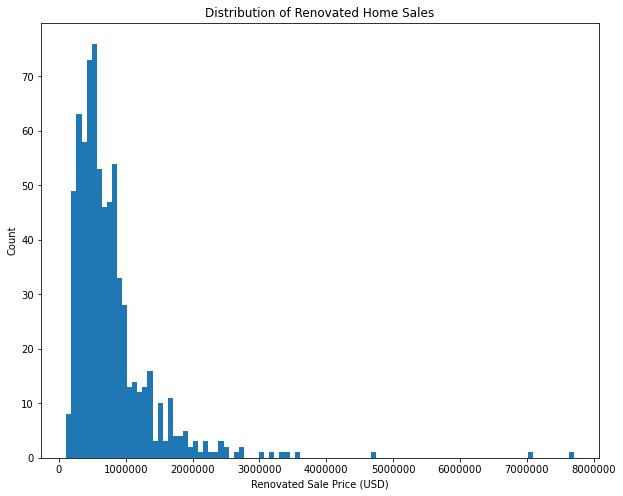

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(renovated_df.price, bins=100)
ax.ticklabel_format(style='plain')
ax.set_xlabel("Renovated Sale Price (USD)")
ax.set_ylabel("Count")
ax.set_title("Distribution of Renovated Home Sales");

In [29]:
avg_sale_price_by_reno_time = renovated_df.groupby('reno_year_to_sale_time')['price'].mean()
avg_sale_price_by_reno_time.sort_values(ascending=False)

reno_year_to_sale_time
27.0    1.732500e+06
13.0    1.361164e+06
12.0    1.249879e+06
5.0     1.132556e+06
7.0     1.051462e+06
            ...     
64.0    2.760000e+05
47.0    2.536333e+05
61.0    2.475000e+05
54.0    1.818500e+05
65.0    1.529000e+05
Name: price, Length: 70, dtype: float64

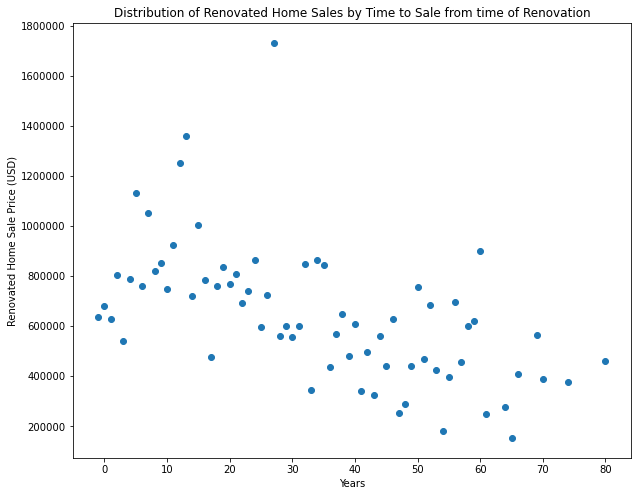

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
x = avg_sale_price_by_reno_time.values 
years = avg_sale_price_by_reno_time.index
ax.scatter(years, x)
ax.ticklabel_format(style='plain')
ax.set_xlabel("Years")
ax.set_ylabel("Renovated Home Sale Price (USD)")
ax.set_title("Distribution of Renovated Home Sales by Time to Sale from time of Renovation");

In [31]:
import statsmodels
from statsmodels.formula.api import ols
reno_form = "price ~ reno_year_to_sale_time"
reno_lrm = ols(reno_form, renovated_df).fit()
reno_lrm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     11.56
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           0.000712
Time:                        09:40:14   Log-Likelihood:                -10670.
No. Observations:                 723   AIC:                         2.134e+04
Df Residuals:                     721   BIC:                         2.135e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               8.611e+05   3.58e+04     24.060      0.000    7.91e+05    9.31e+05
reno_year_to_sale_time -5096.6905   1499.265     -3.399      0.001   -8040.137   -2153.244
==============================================================================
Omnibus:                      744.400   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47986.383
Skew:                           4.671   Prob(JB):                         0.00
Kurtosis:                      41.802   Cond. No.                         37.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
zipcode_df = df.copy()
zipcode_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178
1,6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125
2,5631500400,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028
3,2487200875,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136
4,1954400510,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074


In [33]:
zipcode_df['zipcode'] = zipcode_df['zipcode'].astype(object)
zipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19258 non-null  object 
 9   view           21536 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17843 non-null  float64
 16  zipcode        21597 non-null  object 
dtypes: float64(5), int64(6), object(6)
memory usage: 2

In [34]:
zipcode_df['view'].value_counts()

NONE         19018
AVERAGE        930
GOOD           496
0              454
FAIR           327
EXCELLENT      311
Name: view, dtype: int64

In [35]:
zipcode_df.loc[zipcode_df['view'].isna()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
7,2008000270,2015-01-15 00:00:00,291850.0,3,1.50,1060,9711,1.0,NO,NaN,Average,7 Average,1060,0.0,1963,0.0,98198
114,8961960160,2014-10-28 00:00:00,480000.0,4,2.50,3230,16171,2.0,NO,NaN,Average,9 Better,2520,710.0,2001,0.0,98001
129,7853210060,2015-04-06 00:00:00,430000.0,4,2.50,2070,4310,2.0,NO,NaN,Average,7 Average,2070,0.0,2004,0.0,98065
205,3456000310,2014-08-04 00:00:00,840000.0,4,1.75,2480,11010,1.0,NO,NaN,Good,9 Better,1630,850.0,1966,NaN,98040
487,1895000260,2014-07-21 00:00:00,207950.0,2,2.00,890,5000,1.0,NO,NaN,Average,6 Low Average,890,0.0,1917,0.0,98118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,148000475,2014-05-28 00:00:00,1400000.0,4,3.25,4700,9160,1.0,NO,NaN,Average,11 Excellent,2520,2180.0,2005,0.0,98116
20148,291310170,2014-08-04 00:00:00,384500.0,3,2.50,1600,2610,2.0,NO,NaN,Average,8 Good,1600,0.0,2005,NaN,98027
20380,1196003740,2014-09-24 00:00:00,734000.0,5,4.25,4110,42755,2.0,NO,NaN,Average,10 Very Good,2970,1140.0,2000,NaN,98023
21057,3448900290,2014-08-28 00:00:00,636230.0,4,2.50,2840,6284,2.0,NO,NaN,Average,9 Better,2840,0.0,2013,0.0,98056


In [36]:
zipcode_df['view'].fillna(value='NONE', inplace=True)
zipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19258 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17843 non-null  float64
 16  zipcode        21597 non-null  object 
dtypes: float64(5), int64(6), object(6)
memory usage: 2

In [37]:
zipcode_df['view'].replace(to_replace=0, value='NONE', inplace=True)

In [38]:
zipcode_df['view'].value_counts()

NONE         19533
AVERAGE        930
GOOD           496
FAIR           327
EXCELLENT      311
Name: view, dtype: int64

In [39]:
zipcode_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178
1,6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125
2,5631500400,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028
3,2487200875,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136
4,1954400510,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074


In [40]:
zipcode_df['waterfront'].value_counts()

NO     18662
0        454
YES      142
Name: waterfront, dtype: int64

In [41]:
zipcode_df['waterfront'].replace(to_replace=0, value='NO', inplace=True)

In [42]:
zipcode_df['waterfront'].isna().sum()

2339

In [43]:
zipcode_df['waterfront'].fillna(value="NO", inplace=True)
zipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17843 non-null  float64
 16  zipcode        21597 non-null  object 
dtypes: float64(5), int64(6), object(6)
memory usage: 2

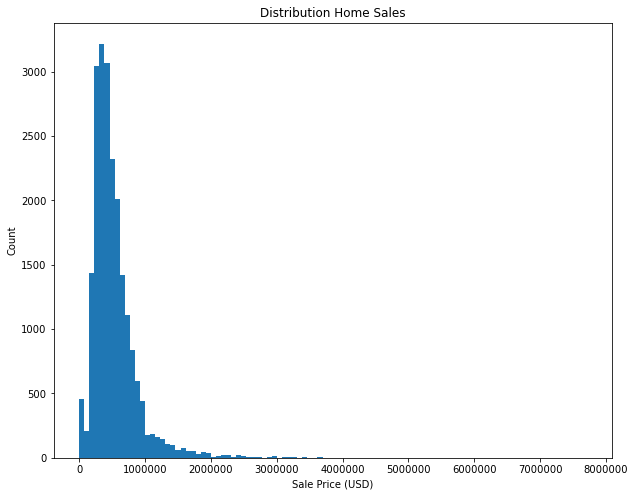

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(zipcode_df.price, bins=100)
ax.ticklabel_format(style='plain')
ax.set_xlabel("Sale Price (USD)")
ax.set_ylabel("Count")
ax.set_title("Distribution Home Sales");

In [54]:
zipcode_df.groupby('zipcode')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
zipcode,,,,,,,,
98001,353.0,2.817962e+05,97400.959948,100000.0,219000.0,260000.0,321000.0,850000.0
98002,198.0,2.345127e+05,52073.008603,95000.0,200000.0,235000.0,268750.0,389000.0
98003,273.0,2.949962e+05,108509.309162,128000.0,229000.0,267950.0,333000.0,950000.0
98004,315.0,1.357423e+06,748234.964312,425000.0,844250.0,1150000.0,1695000.0,7060000.0
98005,167.0,8.102914e+05,269788.129065,400000.0,636850.0,762450.0,912500.0,1960000.0
...,...,...,...,...,...,...,...,...
98177,252.0,6.737220e+05,437012.970936,245560.0,426500.0,550250.0,729362.5,3800000.0
98178,258.0,3.111459e+05,162169.420370,90000.0,223250.0,276277.0,350000.0,1700000.0
98188,131.0,2.899845e+05,104247.833580,110000.0,231500.0,265000.0,335000.0,707000.0


In [47]:
zipcode_df.groupby('view')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
view,,,,,,,,
AVERAGE,930.0,7.921373e+05,515475.472635,169317.0,480000.0,675000.0,941875.0,7060000.0
EXCELLENT,311.0,1.460431e+06,936984.023426,252000.0,817500.0,1190000.0,1850000.0,6890000.0
FAIR,327.0,8.146794e+05,514833.948838,217000.0,494650.0,695000.0,932500.0,3650000.0
GOOD,496.0,9.745548e+05,614911.317068,154000.0,551500.0,805000.0,1260000.0,7700000.0
NONE,19533.0,4.857092e+05,295505.254028,0.0,303000.0,426250.0,599000.0,5570000.0


In [48]:
zipcode_df.groupby('waterfront')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
NO,21455.0,5.211938e+05,3.480258e+05,0.0,313725.0,445000.0,634000.0,7700000.0
YES,142.0,1.731020e+06,1.158149e+06,285000.0,821250.0,1590000.0,2300000.0,7060000.0


In [53]:
zipcode_df.groupby('grade')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
10 Very Good,1112.0,1.071601e+06,4.844381e+05,316000.0,767325.0,911500.0,1250000.0,3600000.0
11 Excellent,391.0,1.495514e+06,7.013215e+05,420000.0,1040000.0,1280000.0,1700000.0,7060000.0
12 Luxury,89.0,2.202528e+06,1.028718e+06,835000.0,1500000.0,1820000.0,2700000.0,5350000.0
13 Mansion,13.0,3.710769e+06,1.859545e+06,1780000.0,2420000.0,2980000.0,3800000.0,7700000.0
3 Poor,1.0,2.620000e+05,NaN,262000.0,262000.0,262000.0,262000.0,262000.0
4 Low,27.0,2.120019e+05,9.729450e+04,80000.0,142500.0,200000.0,273500.0,435000.0
5 Fair,235.0,2.500485e+05,1.189032e+05,78000.0,175000.0,229950.0,297000.0,795000.0
6 Low Average,1997.0,3.024549e+05,1.234632e+05,82000.0,215150.0,276000.0,368000.0,1200000.0
7 Average,8788.0,4.023673e+05,1.554566e+05,90000.0,285000.0,375000.0,485000.0,2050000.0


In [60]:
zipcode_df.groupby('condition')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
1,28.0,337801.785714,277924.893426,78000.0,180000.0,262500.0,430500.0,1500000.0
2,166.0,324541.801205,246614.251165,80000.0,188250.0,277000.0,375000.0,2560000.0
3,13726.0,542785.215503,365352.378480,82000.0,329950.0,450900.0,640000.0,7060000.0
4,5557.0,520567.608962,359012.162661,89000.0,302500.0,440000.0,625000.0,7700000.0
5,1666.0,613218.397359,413033.499413,110000.0,350000.0,526750.0,725000.0,3650000.0


In [51]:
cols = ['condition', 'grade', 'zipcode']
zipcode_df[cols] = zipcode_df[zipcode_df[cols] != 0][cols]
zipcode_df.dropna(subset=cols, inplace=True)
zipcode_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,98178
1,6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125
2,5631500400,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028
3,2487200875,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136
4,1954400510,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074


In [55]:
zipcode_df['condition'].replace(to_replace="Poor", value=1, inplace=True)

In [56]:
zipcode_df['condition'].replace(to_replace="Fair", value=2, inplace=True)

In [57]:
zipcode_df['condition'].replace(to_replace="Average", value=3, inplace=True)

In [58]:
zipcode_df['condition'].replace(to_replace="Good", value=4, inplace=True)

In [59]:
zipcode_df['condition'].replace(to_replace="Very Good", value=5, inplace=True)

In [61]:
zipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  object 
 9   view           21143 non-null  object 
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  object 
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  object 
dtypes: float64(5), int64(7), object(5)
memory usage: 2

In [63]:
zipcode_df['grade'].replace(to_replace="3 Poor", value=3, inplace=True)
zipcode_df['grade'].replace(to_replace="4 Low", value=4, inplace=True)
zipcode_df['grade'].replace(to_replace="5 Fair", value=5, inplace=True)
zipcode_df['grade'].replace(to_replace="6 Low Average", value=6, inplace=True)
zipcode_df['grade'].replace(to_replace="7 Average", value=7, inplace=True)
zipcode_df['grade'].replace(to_replace="8 Good", value=8, inplace=True)
zipcode_df['grade'].replace(to_replace="9 Better", value=9, inplace=True)
zipcode_df['grade'].replace(to_replace="10 Very Good", value=10, inplace=True)
zipcode_df['grade'].replace(to_replace="11 Excellent", value=11, inplace=True)
zipcode_df['grade'].replace(to_replace="12 Luxury", value=12, inplace=True)
zipcode_df['grade'].replace(to_replace="13 Mansion", value=13, inplace=True)

In [64]:
zipcode_df.groupby('grade')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
3,1.0,2.620000e+05,NaN,262000.0,262000.0,262000.0,262000.0,262000.0
4,27.0,2.120019e+05,9.729450e+04,80000.0,142500.0,200000.0,273500.0,435000.0
5,235.0,2.500485e+05,1.189032e+05,78000.0,175000.0,229950.0,297000.0,795000.0
6,1997.0,3.024549e+05,1.234632e+05,82000.0,215150.0,276000.0,368000.0,1200000.0
7,8788.0,4.023673e+05,1.554566e+05,90000.0,285000.0,375000.0,485000.0,2050000.0
8,5933.0,5.434709e+05,2.184720e+05,140000.0,390000.0,512500.0,640000.0,3070000.0
9,2557.0,7.736490e+05,3.178185e+05,230000.0,570000.0,720000.0,880000.0,2700000.0
10,1112.0,1.071601e+06,4.844381e+05,316000.0,767325.0,911500.0,1250000.0,3600000.0
11,391.0,1.495514e+06,7.013215e+05,420000.0,1040000.0,1280000.0,1700000.0,7060000.0


In [65]:
zipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  object 
 9   view           21143 non-null  object 
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  object 
dtypes: float64(5), int64(8), object(4)
memory usage: 2

In [67]:
test_model_formula = "price ~ condition + grade + sqft_living "
test_lm = ols(test_model_formula, zipcode_df).fit()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     8522.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:55:39   Log-Likelihood:            -2.9259e+05
No. Observations:               21143   AIC:                         5.852e+05
Df Residuals:                   21139   BIC:                         5.852e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.758e+05   1.75e+04    -50.118      0.000    -9.1e+05   -8.42e+05
condition    6.433e+04   2656.380     24.216      0.000    5.91e+04    6.95e+04
grade        1.076e+05   2272.675     47.338      0.000    1.03e+05    1.12e+05
sqft_living   179.2722      2.879     62.279      0.000     173.630     184.914
==============================================================================
Omnibus:                    16955.011   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1094593.202
Skew:                           3.387   Prob(JB):                         0.00
Kurtosis:                      37.592   Cond. No.                     2.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
test_model_formula1 = "price ~ condition + grade"
test_lm1 = ols(test_model_formula1, zipcode_df).fit()
test_lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     9163.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:00:07   Log-Likelihood:            -2.9437e+05
No. Observations:               21143   AIC:                         5.887e+05
Df Residuals:                   21140   BIC:                         5.888e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.377e+06   1.69e+04    -81.573      0.000   -1.41e+06   -1.34e+06
condition   7.779e+04   2880.163     27.011      0.000    7.21e+04    8.34e+04
grade       2.157e+05   1595.518    135.195      0.000    2.13e+05    2.19e+05
==============================================================================
Omnibus:                    19777.860   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2199721.675
Skew:                           4.167   Prob(JB):                         0.00
Kurtosis:                      52.270   Cond. No.                         78.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""